In [63]:
import pandas as pd
import numpy as np
import shap
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from lime.lime_tabular import LimeTabularExplainer

In [64]:
df = pd.read_csv("creditcard.csv")

# Data Exploration

In [65]:
# Features
features = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V14","V16","V17","V18","V19","V20","V21","V24","V27","V28"]

X = df[features]

In [66]:
# Target variable
y = df["Class"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
# sum(negative instances) / sum(positive instances)
fraud_cases = df[df["Class"] == 1]
non_fraud_cases = df[df["Class"] == 0]

xgb_scale_pos_weight = len(non_fraud_cases.index) / len(fraud_cases.index)
xgb_scale_pos_weight

577.8760162601626

In [69]:
model_XGB = xgboost.XGBClassifier(n_estimators = 100, max_depth = 2, subsample = 0.7, eta = 0.25, 
                                  scale_pos_weight = xgb_scale_pos_weight, max_delta_step = 1)

In [70]:
model_XGB = model_XGB.fit(X_train, y_train)

In [71]:
y_pred = model_XGB.predict(X_test)
y_pred[:60]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
#threshold = 0.95
#binary_predictions = np.where(y_pred >= threshold, 1, 0)
#binary_predictions

In [12]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9908008848003933


In [13]:
# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

# Compute F1-score
f1 = f1_score(y_test, y_pred)

# Compute AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred)  # y_pred_prob should be the predicted probabilities

# Compute ROC curve
#fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print the computed metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Precision: 0.1485
Recall: 0.9184
F1-score: 0.2557
AUC-ROC: 0.9546


In [19]:
#explainer_xgb = shap.Explainer(model_XGB, X100)
#shap_values_xgb = explainer_xgb(X)

In [72]:
explainer = shap.Explainer(model_XGB, X_test)

[18:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [73]:
shap_values = explainer.shap_values(X_test)  

 98%|===================| 55991/56962 [00:41<00:00]        

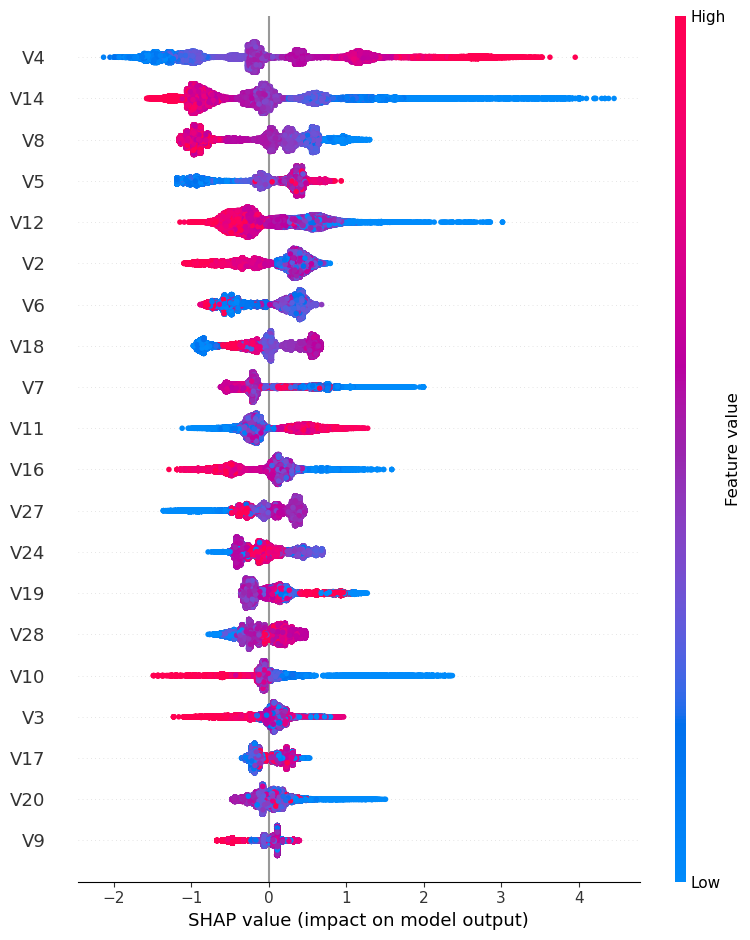

In [40]:
shap.summary_plot(shap_values, X_test, feature_names=features)

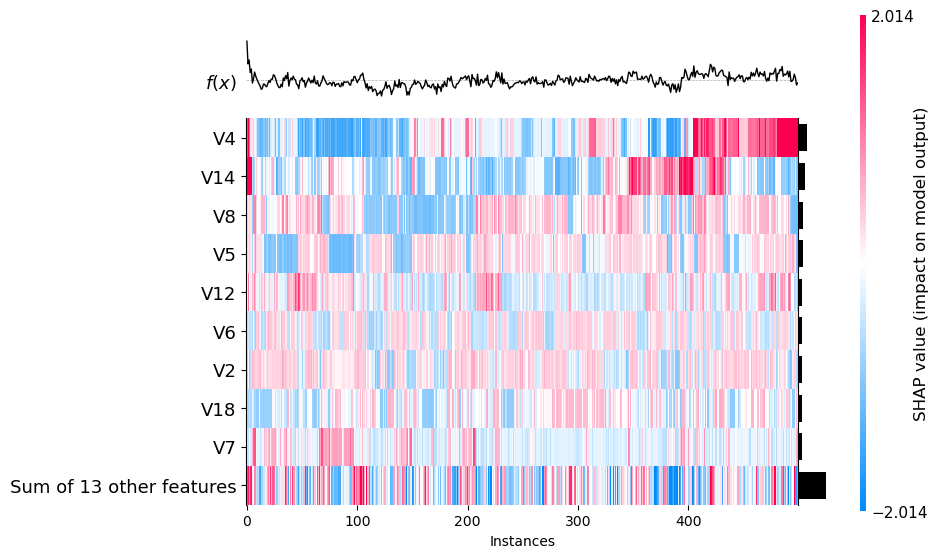

In [60]:
#shap.plots.bar(shap_values)

shap_values = explainer(X_test.iloc[:500])
shap.plots.heatmap(shap_values)

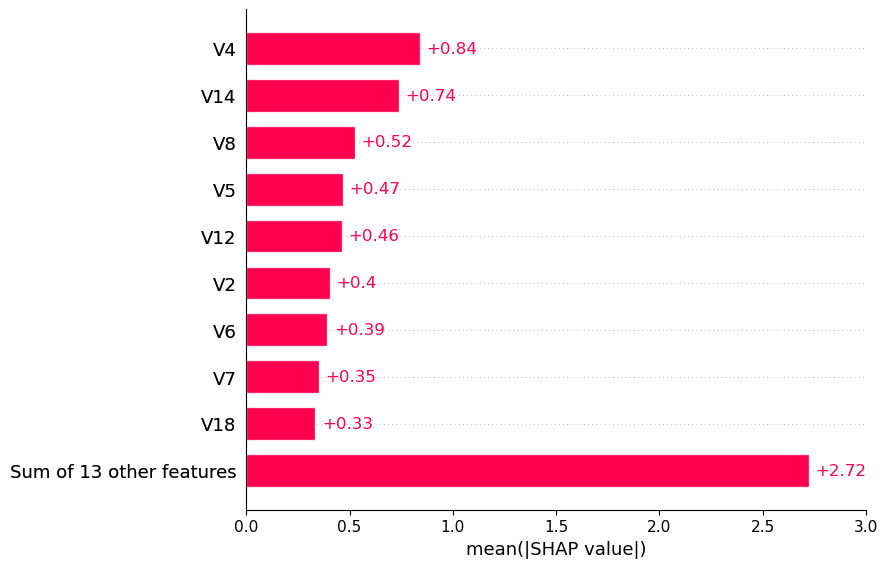

In [56]:
shap.plots.bar(shap_values)

In [207]:
# Explain the model's predictions for the selected instance
shap_values = explainer(X_test.iloc[instance_idx])

# Cnvert SHAP values to a NumPy array
shap_values_array = shap_values.values
#shap_values_array
shap_values_array

array([ 0.0020238 , -0.70167925,  0.05539818, -0.18357536,  0.29671358,
        0.29938488, -0.48023494, -0.94563799,  0.00889184,  0.1650412 ,
       -0.15868026, -0.28008887,  0.71970207, -0.44394022,  0.29602854,
       -0.18076569, -0.2667505 ,  0.23370025,  0.08338384, -0.27827835,
       -0.05457018, -0.17968308])

In [81]:
shap_values.values

array([ 0.03766722, -0.1871356 , -0.10027867, -0.16550994,  0.32838299,
        0.18664944, -0.41794452, -0.96815147, -0.04743555,  0.21004368,
       -0.23057927, -0.37045086, -1.05364427,  0.10849034, -0.11059867,
        0.22135992, -0.2310387 ,  0.19308683,  0.02926216,  0.2572179 ,
       -0.20097261, -0.10477643])

In [74]:
shap.initjs()

In [86]:
instance_idx = 20

# Explain the model's predictions for the selected instance
shap_values = explainer(X_test.iloc[instance_idx])

# Generate the individual force plot for the selected instance
shap.force_plot(explainer.expected_value, shap_values.values, X_test.iloc[instance_idx])

In [226]:
instance_idx = 22

# Explain the model's predictions for instance_idx
shap_values = explainer(X_test.iloc[instance_idx])

# Generate the individual force plot for the selected instance
shap.force_plot(explainer.expected_value, shap_values.values, X_test.iloc[instance_idx])

In [224]:
instance_idx = 51

# Explain the model's predictions for the selected instance
shap_values = explainer(X_test.iloc[instance_idx])

# Generate the individual force plot for the selected instance
shap.force_plot(explainer.expected_value, shap_values.values, X_test.iloc[instance_idx])

In [18]:
instance_idx = 22

# Create a LIME explainer for classification
lime_explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=features, class_names=['Class'])

# Explain the prediction
explanation = lime_explainer.explain_instance(X_test.values[instance_idx], model_XGB.predict_proba, num_features=len(X_test.columns))

# Visualize the explanation
explanation.show_in_notebook()

In [19]:
instance_idx = 51

# Create a LIME explainer for classification
lime_explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=features, class_names=['Class'])

# Explain the prediction
explanation = lime_explainer.explain_instance(X_test.values[instance_idx], model_XGB.predict_proba, num_features=len(X_test.columns))

# Visualize the explanation
explanation.show_in_notebook()

In [31]:
instance_idx = 59

# Create a LIME explainer for classification
lime_explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=features, class_names=['Class'])

# Explain the prediction
explanation = lime_explainer.explain_instance(X_test.values[instance_idx], model_XGB.predict_proba, num_features=len(X_test.columns))

# Visualize the explanation
explanation.show_in_notebook()

In [20]:
instance_idx = 0

# Create a LIME explainer for classification
lime_explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=features, class_names=['Class'])

# Explain the prediction
explanation = lime_explainer.explain_instance(X_test.values[instance_idx], model_XGB.predict_proba, num_features=len(X_test.columns))

# Visualize the explanation
explanation.show_in_notebook()

In [23]:
print(f"{y_pred[0]} {y_pred[22]} {y_pred[51]}")

1 0 1


In [30]:
for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Column '{column}': Min = {min_value:.2f}, Max = {max_value:.2f}")

Column 'Time': Min = 0.00, Max = 172792.00
Column 'V1': Min = -56.41, Max = 2.45
Column 'V2': Min = -72.72, Max = 22.06
Column 'V3': Min = -48.33, Max = 9.38
Column 'V4': Min = -5.68, Max = 16.88
Column 'V5': Min = -113.74, Max = 34.80
Column 'V6': Min = -26.16, Max = 73.30
Column 'V7': Min = -43.56, Max = 120.59
Column 'V8': Min = -73.22, Max = 20.01
Column 'V9': Min = -13.43, Max = 15.59
Column 'V10': Min = -24.59, Max = 23.75
Column 'V11': Min = -4.80, Max = 12.02
Column 'V12': Min = -18.68, Max = 7.85
Column 'V13': Min = -5.79, Max = 7.13
Column 'V14': Min = -19.21, Max = 10.53
Column 'V15': Min = -4.50, Max = 8.88
Column 'V16': Min = -14.13, Max = 17.32
Column 'V17': Min = -25.16, Max = 9.25
Column 'V18': Min = -9.50, Max = 5.04
Column 'V19': Min = -7.21, Max = 5.59
Column 'V20': Min = -54.50, Max = 39.42
Column 'V21': Min = -34.83, Max = 27.20
Column 'V22': Min = -10.93, Max = 10.50
Column 'V23': Min = -44.81, Max = 22.53
Column 'V24': Min = -2.84, Max = 4.58
Column 'V25': Min = 

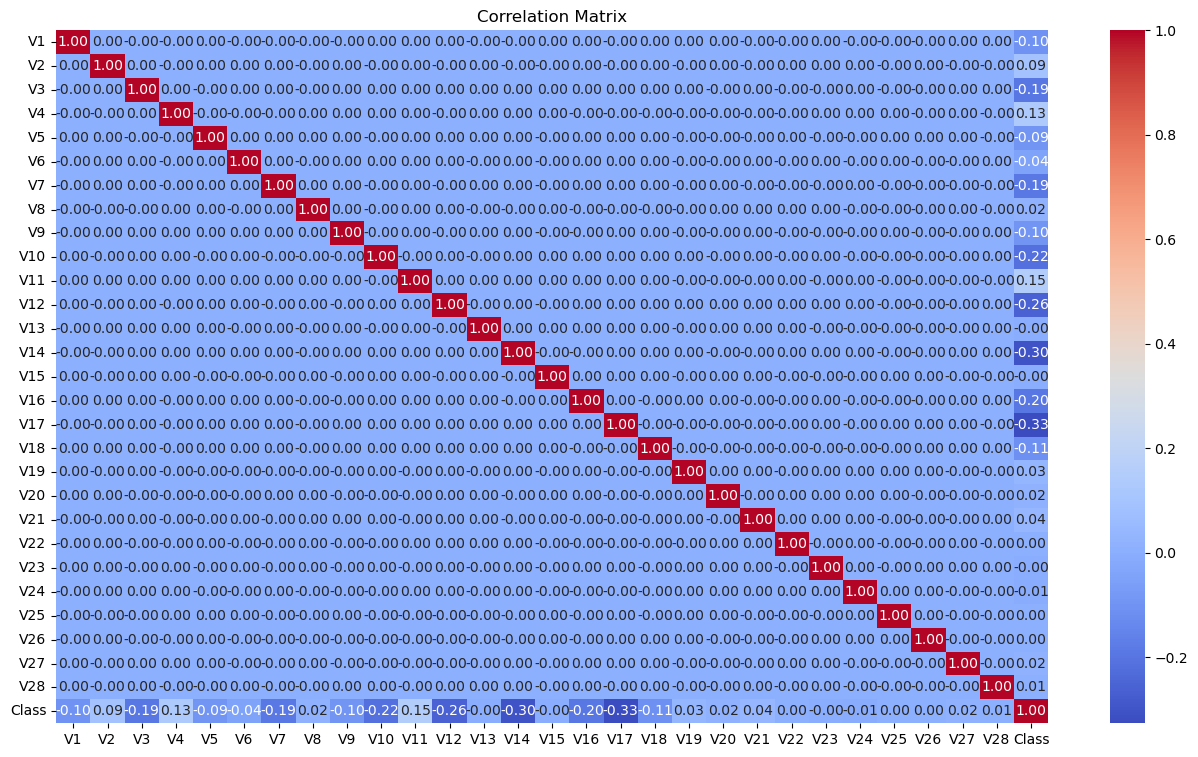

In [52]:
# Assuming you have a DataFrame named 'df' with columns V1 to V28 and 'Class'
correlation_matrix = df[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17',
                         'V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28', 'Class']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

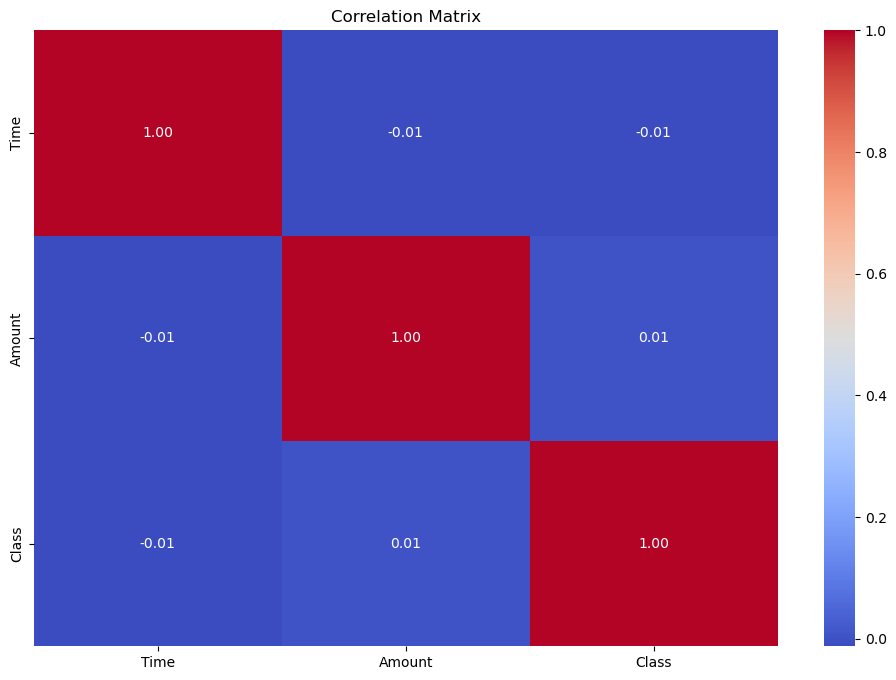

In [72]:
# Assuming you have a DataFrame named 'df' with columns V1 to V28 and 'Class'
correlation_matrix = df[['Time','Amount','Class']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()